In [2]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 15.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [18]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/WGEM-IND_CPTOTNSXN.csv", index_col=0)
df.head()

,Value
Date,
31-12-1987,19.448655
31-12-1988,21.274000
31-12-1989,21.967677
31-12-1990,23.939126
31-12-1991,27.259261


In [20]:
idx = pd.to_datetime( df.index , dayfirst=True).to_period("Y")
df.index = idx
idx

PeriodIndex(['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
             '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
             '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
            dtype='period[A-DEC]', name='Date')

Plot:

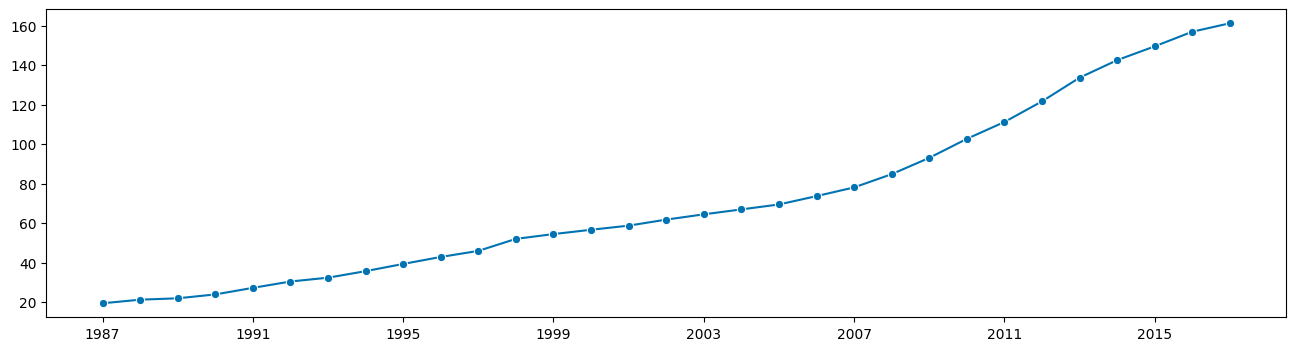

In [21]:
plot_series(df)
plt.show()

In [22]:
y = df['Value']
y_train, y_test = temporal_train_test_split(y,test_size=4)

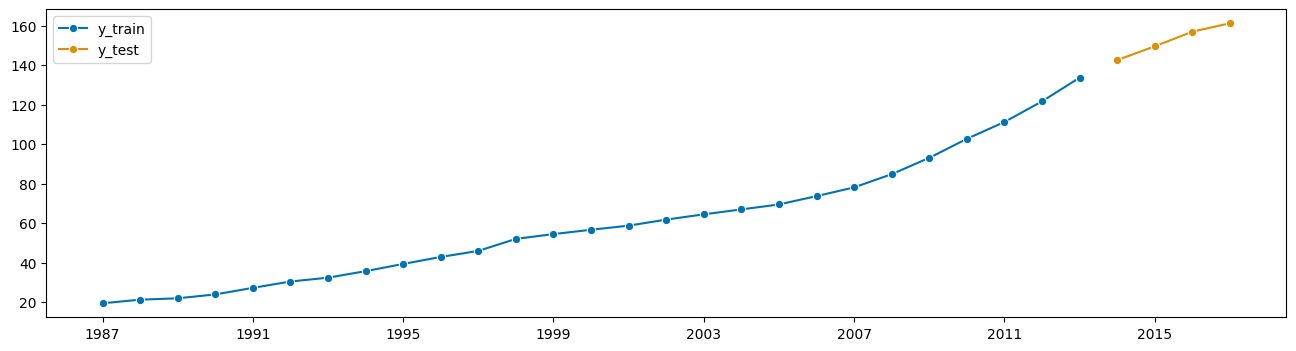

In [23]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

Speciying the Forecasting Horizon:

In [24]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2014', '2015', '2016', '2017'], dtype='period[A-DEC]', is_relative=False)

State Space Models Approach:

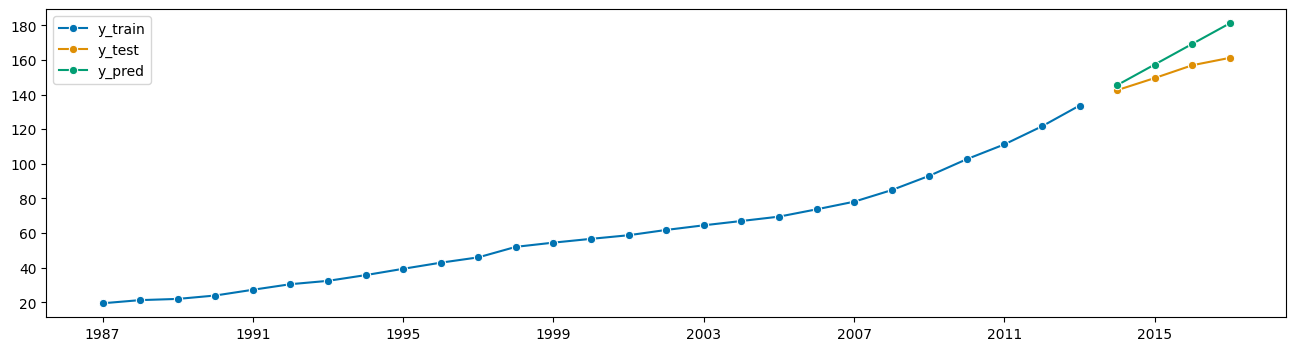

In [29]:
forecaster = AutoETS(auto=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [30]:
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   27
Model:                       ETS(AAN)   Log Likelihood                 -46.843
Date:                Sat, 13 Jan 2024   AIC                            103.685
Time:                        06:44:10   BIC                            110.165
Sample:                    12-31-1987   HQIC                           105.612
                         - 12-31-2013   Scale                            1.881
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9349      0.186      5.024      0.000       0.570       1.300
smoothing_trend     0.8995      0.205      4.389      0.000       0.498       1.301
initial_level      17.8829      

In [31]:
print(mean_squared_error(y_test, y_pred,square_root=True))

12.456244166979179
